# Tokenización y Embeddings en NLP

### Conceptos Fundamentales del Procesamiento de Lenguaje Natural

Este notebook cubre los conceptos esenciales que debes entender para trabajar con modelos de lenguaje:

### 1. ¿Qué es un TOKEN? 

Un **token** es una unidad mínima de texto que el modelo usa internamente, es como una "pieza" de texto. Imagina que el texto es un Lego y cada token es una pieza individual.
  

Si una frase es una pizza :
- Los tokens son las porciones en las que la cortas
- Puedes cortarla en porciones grandes (palabras completas)
- O en porciones pequeñas (partes de palabras)

Según el modelo, un token puede ser:

- Una palabra completa (`hola`)
- Una parte de palabra (`pro`, `gram`, `ador` )
- Un signo de puntuación (`?`, `!`, `,`)
- Numericos (`1`, `23`, `876`)

Tokens especiales del modelo  
Cada modelo define sus propios tokens funcionales.

| Token | Uso |
|-------|-----|
| `<s>` | Inicio de secuencia |
| `</s>` | Fin de secuencia |
| `<unk>` | Token desconocido |
| `<pad>` | Relleno |
| `<cls>` | Clasificación (BERT) |


### ¿Por qué necesitamos tokens?

Los ordenadores no entienden palabras directamente. Necesitan dividir el texto en pedazos más pequeños que puedan convertir en números.

Ejemplo intuitivo:

Frase: `Los gatos son geniales`

Posibles tokens (simplificados):

- `Los`
- `gatos`
- `son`
- `geniales`

En la práctica, los modelos usan reglas más complejas para partir el texto.




In [1]:
# =============================================================================
# EJEMPLO 1: Tokenización Simple por Espacios
# =============================================================================
# Este es el método más básico de tokenización: dividir el texto por espacios.
# Aunque es simple, tiene limitaciones (no separa la puntuación de las palabras).

# Texto de ejemplo más sustancial para ver mejor el proceso
texto = """La inteligencia artificial está transformando el mundo.
Los modelos de lenguaje como GPT-4 pueden entender y generar texto,
responder preguntas y realizar tareas complejas."""

# Método .split() de Python: divide el string por espacios en blanco
# Devuelve una lista de palabras (tokens)
tokens_simple = texto.split()  # Dividir por espacios

# --- MOSTRAR RESULTADOS ---
print("Texto original:")
print(texto)

print("\nTokens (división simple):")
print(tokens_simple)

# Contar cuántos tokens obtuvimos usando len()
print(f"\nNúmero de tokens: {len(tokens_simple)}")

# NOTA: Observa que la puntuación queda pegada a las palabras
# Ejemplo: "mundo." se considera UN token, no dos (palabra + punto)
# Los modelos profesionales separan puntuación para mejor análisis

Texto original:
La inteligencia artificial está transformando el mundo.
Los modelos de lenguaje como GPT-4 pueden entender y generar texto,
responder preguntas y realizar tareas complejas.

Tokens (división simple):
['La', 'inteligencia', 'artificial', 'está', 'transformando', 'el', 'mundo.', 'Los', 'modelos', 'de', 'lenguaje', 'como', 'GPT-4', 'pueden', 'entender', 'y', 'generar', 'texto,', 'responder', 'preguntas', 'y', 'realizar', 'tareas', 'complejas.']

Número de tokens: 24


In [2]:
# =============================================================================
# EJEMPLO 2: Diferentes Tipos de Tokens
# =============================================================================
# Vamos a ver cómo diferentes métodos de tokenización manejan casos complejos:
# - Palabras con puntuación
# - Palabras con números
# - Emojis
# - Emails
# - Palabras muy largas

# Importar la librería 're' (Regular Expressions) para tokenización avanzada
import re

# Lista de ejemplos que representan diferentes desafíos de tokenización
ejemplos = [
    "¡Hola!",                    # Palabra con puntuación
    "COVID-19",                  # Palabra con números y guion
    "machine learning",          # Frase en inglés
    "anticonstitucionalmente",   # Palabra muy larga
    "😀",                        # Emoji
    "user@email.com"             # Email
]

print("Diferentes formas de tokenizar:")
print("=" * 50)

# Iterar sobre cada ejemplo y aplicar 3 métodos diferentes de tokenización
for texto in ejemplos:
    print(f"\nTexto: '{texto}'")
    
    # --- OPCIÓN 1: Tokenizar por espacios (método simple) ---
    tokens_espacios = texto.split()
    print(f"  Por espacios: {tokens_espacios}")
    
    # --- OPCIÓN 2: Tokenizar por caracteres individuales ---
    # Convierte el texto en una lista de caracteres
    tokens_caracteres = list(texto)
    print(f"  Por caracteres: {tokens_caracteres[:10]}...")  # Mostrar primeros 10
    
    # --- OPCIÓN 3: Tokenizar por palabras Y puntuación (método inteligente) ---
    # Regex: \w+ captura secuencias de letras/números, [^\w\s] captura puntuación
    tokens_palabras = re.findall(r'\w+|[^\w\s]', texto)
    print(f"  Por palabras: {tokens_palabras}")

# CONCLUSIÓN: El método que elijas depende de tu aplicación.
# Para NLP profesional, usamos métodos más sofisticados (NLTK, spaCy, etc.)

Diferentes formas de tokenizar:

Texto: '¡Hola!'
  Por espacios: ['¡Hola!']
  Por caracteres: ['¡', 'H', 'o', 'l', 'a', '!']...
  Por palabras: ['¡', 'Hola', '!']

Texto: 'COVID-19'
  Por espacios: ['COVID-19']
  Por caracteres: ['C', 'O', 'V', 'I', 'D', '-', '1', '9']...
  Por palabras: ['COVID', '-', '19']

Texto: 'machine learning'
  Por espacios: ['machine', 'learning']
  Por caracteres: ['m', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'l', 'e']...
  Por palabras: ['machine', 'learning']

Texto: 'anticonstitucionalmente'
  Por espacios: ['anticonstitucionalmente']
  Por caracteres: ['a', 'n', 't', 'i', 'c', 'o', 'n', 's', 't', 'i']...
  Por palabras: ['anticonstitucionalmente']

Texto: '😀'
  Por espacios: ['😀']
  Por caracteres: ['😀']...
  Por palabras: ['😀']

Texto: 'user@email.com'
  Por espacios: ['user@email.com']
  Por caracteres: ['u', 's', 'e', 'r', '@', 'e', 'm', 'a', 'i', 'l']...
  Por palabras: ['user', '@', 'email', '.', 'com']


### Visualización de Tokens

Veamos cómo diferentes frases se dividen en tokens:

In [3]:
# =============================================================================
# EJEMPLO 3: Comparación Visual de Tokenización
# =============================================================================
# Creamos una función para visualizar claramente cómo se divide un texto en tokens

def mostrar_tokens(texto):
    """
    Muestra el texto con sus tokens separados visualmente usando barras |
    
    Args:
        texto (str): El texto a tokenizar
    
    Returns:
        list: Lista de tokens
    """
    # Usar regex para separar palabras y puntuación
    tokens = re.findall(r'\w+|[^\w\s]', texto)
    
    # Mostrar el texto original
    print(f"\nTexto: {texto}")
    
    # Mostrar los tokens separados por |
    print(f"Tokens: [ {' | '.join(tokens)} ]")
    
    # Contar y mostrar el total de tokens
    print(f"Total: {len(tokens)} tokens\n")
    
    return tokens

# --- CONJUNTO DE FRASES DE EJEMPLO ---
frases = [
    "El gato come pescado.",
    "¡Qué bonito día hace hoy!",
    "El precio es $25.99",
    "¿Dónde está María?",
    "I love Python programming!"
]

print("=" * 60)
print("COMPARACIÓN DE TOKENIZACIÓN")
print("=" * 60)

# Tokenizar cada frase y mostrar los resultados
for frase in frases:
    mostrar_tokens(frase)

# OBSERVACIÓN: Nota cómo los signos de puntuación se separan correctamente
# Esto es importante para que el modelo trate "pescado" y "pescado." como la misma palabra base

COMPARACIÓN DE TOKENIZACIÓN

Texto: El gato come pescado.
Tokens: [ El | gato | come | pescado | . ]
Total: 5 tokens


Texto: ¡Qué bonito día hace hoy!
Tokens: [ ¡ | Qué | bonito | día | hace | hoy | ! ]
Total: 7 tokens


Texto: El precio es $25.99
Tokens: [ El | precio | es | $ | 25 | . | 99 ]
Total: 7 tokens


Texto: ¿Dónde está María?
Tokens: [ ¿ | Dónde | está | María | ? ]
Total: 5 tokens


Texto: I love Python programming!
Tokens: [ I | love | Python | programming | ! ]
Total: 5 tokens





### 2. ¿Qué es TOKENIZAR?

### Definición Simple

**Tokenizar** es el proceso de cortar texto en tokens. Es como usar unas tijeras para dividir una cadena de texto en pedazos manejables.

###  Tokenizar para entrenamiento

Cuando entrenamos un modelo de lenguaje, necesitamos convertir el texto en tokens.
Ese proceso se llama **tokenización**.

Para entrenamiento, la tokenización se usa para:

1. Convertir grandes cantidades de texto (corpus) en secuencias de IDs numéricos.
2. Crear pares de entrada/salida. Por ejemplo, el modelo aprende a predecir el siguiente token.

Ejemplo conceptual:

Texto: `Hola mundo`

Supón que el vocabulario del modelo asigna:

- `Hola` → 101
- `mundo` → 57

Entonces la frase se convierte en: `[101, 57]`

Durante el entrenamiento, el modelo ve:

- Entrada: `[101]`
- Objetivo (lo que debe predecir): `57`

En realidad, se usan secuencias más largas, millones (o billones) de ejemplos y técnicas más avanzadas, pero la idea básica es esta.

In [4]:
# =============================================================================
# INSTALACIÓN Y CONFIGURACIÓN DE NLTK
# =============================================================================
# NLTK (Natural Language Toolkit) es una librería profesional para NLP
# Necesita descargar recursos adicionales la primera vez que se usa

# Si necesitas instalar NLTK, descomenta la siguiente línea:
# !pip install nltk spacy

import nltk

# Descargar el tokenizador 'punkt' (solo necesario la primera vez)
# Este tokenizador es muy inteligente y maneja bien el español
try:
    # Verificar si 'punkt' ya está instalado
    nltk.data.find('tokenizers/punkt')
    print("✓ El tokenizador 'punkt' ya está instalado")
except LookupError:
    # Si no está instalado, descargarlo
    print("Descargando tokenizador 'punkt'...")
    nltk.download('punkt')
    print("✓ Descarga completada")

✓ El tokenizador 'punkt' ya está instalado


In [5]:
# =============================================================================
# EJEMPLO 4: Tokenización Profesional con NLTK
# =============================================================================
# NLTK ofrece tokenización avanzada que maneja casos complejos correctamente

# Descargar recursos necesarios de NLTK
nltk.download('punkt')        # Tokenizador de palabras
nltk.download('punkt_tab')    # Datos adicionales para el tokenizador

# Importar las funciones de tokenización de NLTK
from nltk.tokenize import word_tokenize, sent_tokenize

# --- TEXTO DE EJEMPLO ---
# Este texto tiene varios desafíos:
# - Abreviaturas (Dr., EE.UU.)
# - Términos técnicos (machine learning, LLMs)
# - Números y fechas (2023, 1.5)
texto_largo = """
El Dr. García trabaja en inteligencia artificial desde 2023. 
Su equipo en la Universidad de Madrid ha desarrollado varios proyectos sobre procesamiento 
de lenguaje natural. El machine learning permite que los LLMs procesen millones de tokens 
por segundo. Por ejemplo, GPT-4 puede analizar documentos de más de 1.5 millones de palabras.
Los investigadores del MIT y de Stanford colaboran en este campo.
¿Sabías que estos modelos aprenden patrones estadísticos del lenguaje?
"""

print("TOKENIZACIÓN PROFESIONAL CON NLTK")
print("=" * 60)

# --- 1. TOKENIZACIÓN POR ORACIONES ---
# sent_tokenize divide el texto en oraciones completas
# Es inteligente: sabe que "Dr." NO es el final de una oración
oraciones = sent_tokenize(texto_largo, language='spanish')

print("\n1. Tokenización por ORACIONES:")
for i, oracion in enumerate(oraciones, 1):
    print(f"   Oración {i}: {oracion.strip()}")

# --- 2. TOKENIZACIÓN POR PALABRAS ---
# word_tokenize divide el texto en palabras individuales
# Separa correctamente la puntuación y maneja casos especiales
palabras = word_tokenize(texto_largo, language='spanish')

print(f"\n2. Tokenización por PALABRAS:")
print(f"   Total de tokens: {len(palabras)}")
print(f"   Primeros 20 tokens: {palabras[:20]}")
print(f"   Últimos 15 tokens: {palabras[-15:]}")

# VENTAJA DE NLTK: Reconoce que "Dr." y "EE.UU." son abreviaciones
# También mantiene números como "1.5" juntos, no los separa
# Esto es crucial para procesamiento de texto de calidad

TOKENIZACIÓN PROFESIONAL CON NLTK

1. Tokenización por ORACIONES:
   Oración 1: El Dr. García trabaja en inteligencia artificial desde 2023.
   Oración 2: Su equipo en la Universidad de Madrid ha desarrollado varios proyectos sobre procesamiento 
de lenguaje natural.
   Oración 3: El machine learning permite que los LLMs procesen millones de tokens 
por segundo.
   Oración 4: Por ejemplo, GPT-4 puede analizar documentos de más de 1.5 millones de palabras.
   Oración 5: Los investigadores del MIT y de Stanford colaboran en este campo.
   Oración 6: ¿Sabías que estos modelos aprenden patrones estadísticos del lenguaje?

2. Tokenización por PALABRAS:
   Total de tokens: 78
   Primeros 20 tokens: ['El', 'Dr.', 'García', 'trabaja', 'en', 'inteligencia', 'artificial', 'desde', '2023', '.', 'Su', 'equipo', 'en', 'la', 'Universidad', 'de', 'Madrid', 'ha', 'desarrollado', 'varios']
   Últimos 15 tokens: ['colaboran', 'en', 'este', 'campo', '.', '¿Sabías', 'que', 'estos', 'modelos', 'aprenden', 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\borja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\borja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
# =============================================================================
# EJEMPLO 5: Comparación de Diferentes Métodos de Tokenización
# =============================================================================
# Vamos a comparar 4 métodos diferentes sobre el MISMO texto
# para ver las diferencias en el resultado

# Texto de prueba con varios elementos complejos
texto_prueba = "El COVID-19 afectó a 7.5 millones de personas en 2020-2021."

print("COMPARACIÓN DE MÉTODOS DE TOKENIZACIÓN")
print("=" * 60)
print(f"Texto: {texto_prueba}\n")

# --- MÉTODO 1: Split simple (dividir por espacios) ---
# Rápido pero impreciso: no separa puntuación
tokens_split = texto_prueba.split()
print(f"1. Split simple: {len(tokens_split)} tokens")
print(f"   {tokens_split}\n")

# --- MÉTODO 2: Regular Expressions (Regex) ---
# Separa palabras y puntuación, pero trata números y guiones individualmente
tokens_regex = re.findall(r'\w+|[^\w\s]', texto_prueba)
print(f"2. Con regex: {len(tokens_regex)} tokens")
print(f"   {tokens_regex}\n")

# --- MÉTODO 3: NLTK (Profesional) ---
# El más inteligente: mantiene "COVID-19" y "7.5" como tokens únicos
tokens_nltk = word_tokenize(texto_prueba, language='spanish')
print(f"3. NLTK: {len(tokens_nltk)} tokens")
print(f"   {tokens_nltk}\n")

# --- MÉTODO 4: Por caracteres individuales ---
# El más granular: convierte cada carácter en un token
tokens_chars = list(texto_prueba)
print(f"4. Por caracteres: {len(tokens_chars)} tokens")
print(f"   {tokens_chars[:20]}... (primeros 20)\n")

# CONCLUSIÓN:
# - Split simple: 10 tokens (rápido pero impreciso)
# - Regex: 17 tokens (separa demasiado)
# - NLTK: 11 tokens (equilibrio perfecto - RECOMENDADO)
# - Caracteres: 59 tokens (demasiado granular para la mayoría de casos)

COMPARACIÓN DE MÉTODOS DE TOKENIZACIÓN
Texto: El COVID-19 afectó a 7.5 millones de personas en 2020-2021.

1. Split simple: 10 tokens
   ['El', 'COVID-19', 'afectó', 'a', '7.5', 'millones', 'de', 'personas', 'en', '2020-2021.']

2. Con regex: 17 tokens
   ['El', 'COVID', '-', '19', 'afectó', 'a', '7', '.', '5', 'millones', 'de', 'personas', 'en', '2020', '-', '2021', '.']

3. NLTK: 11 tokens
   ['El', 'COVID-19', 'afectó', 'a', '7.5', 'millones', 'de', 'personas', 'en', '2020-2021', '.']

4. Por caracteres: 59 tokens
   ['E', 'l', ' ', 'C', 'O', 'V', 'I', 'D', '-', '1', '9', ' ', 'a', 'f', 'e', 'c', 't', 'ó', ' ', 'a']... (primeros 20)



###  Ejercicio Práctico 1

Tokeniza el siguiente texto y cuenta cuántas veces aparece cada palabra:

In [7]:
# =============================================================================
# EJEMPLO 6: Análisis de Frecuencia de Tokens
# =============================================================================
# Este ejemplo muestra cómo analizar qué palabras son más comunes en un texto
# Es muy útil para entender el contenido y hacer análisis estadístico

# Importar Counter para contar frecuencias fácilmente
from collections import Counter

# --- TEXTO DE ANÁLISIS ---
# Texto más extenso y realista sobre inteligencia artificial
texto_analisis = """
La inteligencia artificial está transformando el mundo moderno de formas increíbles.
Los sistemas de inteligencia artificial pueden procesar información, aprender de datos
y tomar decisiones complejas. El aprendizaje automático, una rama de la inteligencia artificial,
permite que las máquinas mejoren su rendimiento con la experiencia.
Los modelos de lenguaje utilizan inteligencia artificial para entender y generar texto.
GPT es un modelo de lenguaje que utiliza redes neuronales profundas.
Las redes neuronales son fundamentales para el desarrollo de la inteligencia artificial moderna.
Python es el lenguaje de programación preferido para proyectos de inteligencia artificial.
Los científicos de datos utilizan Python para construir modelos de aprendizaje automático.
La inteligencia artificial seguirá evolucionando en los próximos años.
"""

# --- PASO 1: Tokenizar el texto ---
# Convertir a minúsculas para que "Python" y "python" se cuenten juntos
tokens = word_tokenize(texto_analisis.lower(), language='spanish')

# --- PASO 2: Filtrar solo palabras (eliminar puntuación) ---
# .isalnum() devuelve True solo para tokens alfanuméricos (letras y números)
# Esto elimina puntuación como ".", ",", etc.
palabras = [token for token in tokens if token.isalnum()]

# --- PASO 3: Filtrar palabras vacías (stopwords) ---
# Palabras muy comunes que no aportan mucho significado
stopwords_es = {'el', 'la', 'de', 'que', 'y', 'a', 'en', 'los', 'del', 'se', 
                'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al',
                'es', 'lo', 'como', 'más', 'o', 'pero', 'sus', 'le', 'ha'}

# Palabras significativas (sin stopwords)
palabras_significativas = [p for p in palabras if p not in stopwords_es]

# --- PASO 4: Contar frecuencias ---
# Counter crea un diccionario con el conteo de cada palabra
frecuencias_todas = Counter(palabras)
frecuencias_significativas = Counter(palabras_significativas)

# --- MOSTRAR RESULTADOS ---
print("ANÁLISIS DE FRECUENCIA DE TOKENS")
print("=" * 60)
print(f"Total de tokens (incluyendo puntuación): {len(tokens)}")
print(f"Total de palabras (sin puntuación): {len(palabras)}")
print(f"Palabras únicas en el vocabulario: {len(frecuencias_todas)}")
print(f"Palabras significativas (sin stopwords): {len(palabras_significativas)}\n")

print("Top 15 palabras más frecuentes (TODAS):")
for palabra, frecuencia in frecuencias_todas.most_common(15):
    # Crear barra visual de frecuencia
    barra = '█' * frecuencia
    print(f"   {palabra:20} {barra} ({frecuencia})")

print(f"\n{'='*60}")
print("Top 15 palabras significativas (SIN stopwords):")
for palabra, frecuencia in frecuencias_significativas.most_common(15):
    barra = '█' * frecuencia
    print(f"   {palabra:20} {barra} ({frecuencia})")

# APLICACIÓN PRÁCTICA: Este tipo de análisis se usa en:
# - Análisis de sentimientos (detectar palabras positivas/negativas)
# - Detección de spam (palabras sospechosas frecuentes)
# - Extracción de palabras clave (temas principales del documento)
# - Análisis de documentos (resúmenes automáticos)
# - Investigación (análisis de textos históricos o científicos)

ANÁLISIS DE FRECUENCIA DE TOKENS
Total de tokens (incluyendo puntuación): 126
Total de palabras (sin puntuación): 114
Palabras únicas en el vocabulario: 65
Palabras significativas (sin stopwords): 73

Top 15 palabras más frecuentes (TODAS):
   de                   ███████████ (11)
   inteligencia         ███████ (7)
   artificial           ███████ (7)
   la                   █████ (5)
   el                   ████ (4)
   los                  ████ (4)
   para                 ████ (4)
   lenguaje             ███ (3)
   datos                ██ (2)
   y                    ██ (2)
   aprendizaje          ██ (2)
   automático           ██ (2)
   que                  ██ (2)
   las                  ██ (2)
   modelos              ██ (2)

Top 15 palabras significativas (SIN stopwords):
   inteligencia         ███████ (7)
   artificial           ███████ (7)
   lenguaje             ███ (3)
   datos                ██ (2)
   aprendizaje          ██ (2)
   automático           ██ (2)
   modelos        



### 3. TOKENIZACIÓN para ENTRENAMIENTO de LLMs 

### Definición Simple

Cuando entrenamos un modelo de lenguaje (como GPT), necesitamos convertir todo el texto en números que el modelo pueda procesar. Este proceso incluye:

1. **Crear un vocabulario**: Lista de todos los tokens posibles
2. **Asignar IDs**: Cada token recibe un número único
3. **Tokens especiales**: Añadimos tokens para situaciones especiales
4. **Crear secuencias**: Preparamos los datos para que el modelo aprenda a predecir

### Analogía

Imagina que eres un chef :
- El **texto** es tu receta escrita
- Los **tokens** son los ingredientes individuales
- El **vocabulario** es tu inventario de todos los ingredientes disponibles
- Los **IDs** son los códigos de barras de cada ingrediente
- Las **secuencias de entrenamiento** son las combinaciones que funcionan bien juntas

In [8]:
# =============================================================================
# EJEMPLO 7: Construcción de un Vocabulario para LLM
# =============================================================================
# Este es el PRIMER PASO para entrenar un modelo de lenguaje (LLM)
# Necesitamos crear un vocabulario: la lista de todos los tokens únicos

# --- CORPUS DE ENTRENAMIENTO ---
# En la realidad, esto sería millones de frases, pero usamos un ejemplo pequeño
corpus = [
    "El perro ladra.",
    "El gato maúlla.",
    "El perro juega.",
    "El gato duerme."
]

print("CONSTRUCCIÓN DE VOCABULARIO")
print("=" * 60)
print("Corpus (conjunto de textos):")
for i, texto in enumerate(corpus, 1):
    print(f"  {i}. {texto}")

# --- PASO 1: Tokenizar TODO el corpus ---
# Crear una lista que contendrá TODOS los tokens de TODAS las frases
todos_los_tokens = []

for texto in corpus:
    # Tokenizar cada frase (convertir a minúsculas para normalizar)
    tokens = word_tokenize(texto.lower(), language='spanish')
    # Añadir los tokens a la lista general
    todos_los_tokens.extend(tokens)

print(f"\nTodos los tokens: {todos_los_tokens}")

# --- PASO 2: Crear vocabulario (tokens únicos) ---
# Usar set() para eliminar duplicados (solo tokens únicos)
vocabulario_set = set(todos_los_tokens)
# Convertir a lista y ordenar alfabéticamente para mejor visualización
vocabulario = sorted(list(vocabulario_set))

print(f"\nVocabulario (tokens únicos): {vocabulario}")
print(f"Tamaño del vocabulario: {len(vocabulario)} tokens")

# CONCEPTO CLAVE:
# - Todos los tokens: 16 (con repeticiones)
# - Vocabulario: 8 tokens únicos
# Este vocabulario es la "base de conocimiento" del modelo

CONSTRUCCIÓN DE VOCABULARIO
Corpus (conjunto de textos):
  1. El perro ladra.
  2. El gato maúlla.
  3. El perro juega.
  4. El gato duerme.

Todos los tokens: ['el', 'perro', 'ladra', '.', 'el', 'gato', 'maúlla', '.', 'el', 'perro', 'juega', '.', 'el', 'gato', 'duerme', '.']

Vocabulario (tokens únicos): ['.', 'duerme', 'el', 'gato', 'juega', 'ladra', 'maúlla', 'perro']
Tamaño del vocabulario: 8 tokens


In [9]:
# =============================================================================
# EJEMPLO 8: Asignación de IDs a Tokens (Numericización)
# =============================================================================
# Los modelos de IA trabajan con NÚMEROS, no con texto
# Necesitamos asignar un número único (ID) a cada token del vocabulario

# --- TOKENS ESPECIALES ---
# Estos tokens tienen funciones específicas en el modelo
tokens_especiales = {
    "<PAD>": 0,    # Padding: rellena secuencias cortas para igualar longitudes
    "<UNK>": 1,    # Unknown: representa palabras no vistas durante el entrenamiento
    "<BOS>": 2,    # Beginning of Sentence: marca el inicio de una frase
    "<EOS>": 3,    # End of Sentence: marca el final de una frase
}

# --- CREAR DICCIONARIO token -> ID ---
# Comenzamos con los tokens especiales
token_a_id = tokens_especiales.copy()

# El siguiente ID disponible (después de los tokens especiales)
siguiente_id = len(tokens_especiales)  # Empieza en 4

# Asignar un ID único a cada token del vocabulario
for token in vocabulario:
    if token not in token_a_id:  # Evitar duplicados
        token_a_id[token] = siguiente_id
        siguiente_id += 1  # Incrementar para el próximo token

# --- CREAR DICCIONARIO INVERSO ID -> token ---
# Útil para convertir de vuelta los números a texto
id_a_token = {id: token for token, id in token_a_id.items()}

# --- MOSTRAR RESULTADOS ---
print("VOCABULARIO CON IDs")
print("=" * 60)

print("\nTokens especiales:")
for token, id in tokens_especiales.items():
    print(f"  {token:8} -> ID {id}")

print("\nTokens del corpus:")
for token in vocabulario:
    print(f"  '{token:10}' -> ID {token_a_id[token]}")

print(f"\nTamaño total del vocabulario: {len(token_a_id)} tokens")

# CONCEPTO IMPORTANTE:
# Ahora cada palabra tiene un número único
# "perro" = 11, "gato" = 7, etc.
# Esto permite que el modelo procese el texto como matemáticas

VOCABULARIO CON IDs

Tokens especiales:
  <PAD>    -> ID 0
  <UNK>    -> ID 1
  <BOS>    -> ID 2
  <EOS>    -> ID 3

Tokens del corpus:
  '.         ' -> ID 4
  'duerme    ' -> ID 5
  'el        ' -> ID 6
  'gato      ' -> ID 7
  'juega     ' -> ID 8
  'ladra     ' -> ID 9
  'maúlla    ' -> ID 10
  'perro     ' -> ID 11

Tamaño total del vocabulario: 12 tokens


In [10]:
# =============================================================================
# EJEMPLO 9: Convertir Texto a Secuencia de IDs (y viceversa)
# =============================================================================
# Estas funciones son fundamentales para trabajar con LLMs

def texto_a_ids(texto, token_a_id):
    """
    Convierte un texto en una secuencia de IDs numéricos
    
    Args:
        texto (str): El texto a convertir
        token_a_id (dict): Diccionario que mapea tokens a IDs
    
    Returns:
        list: Lista de IDs numéricos
    """
    # Tokenizar el texto
    tokens = word_tokenize(texto.lower(), language='spanish')
    ids = []
    
    # Añadir token de inicio de secuencia
    ids.append(token_a_id["<BOS>"])
    
    # Convertir cada token a su ID correspondiente
    for token in tokens:
        if token in token_a_id:
            # Token conocido: usar su ID
            ids.append(token_a_id[token])
        else:
            # Token desconocido: usar <UNK>
            ids.append(token_a_id["<UNK>"])
    
    # Añadir token de fin de secuencia
    ids.append(token_a_id["<EOS>"])
    
    return ids

def ids_a_texto(ids, id_a_token):
    """
    Convierte una secuencia de IDs de vuelta a texto
    
    Args:
        ids (list): Lista de IDs numéricos
        id_a_token (dict): Diccionario que mapea IDs a tokens
    
    Returns:
        str: Texto reconstruido
    """
    # Convertir cada ID a su token correspondiente
    tokens = [id_a_token[id] for id in ids]
    # Unir los tokens con espacios
    return ' '.join(tokens)

# --- PROBAR LAS FUNCIONES ---
print("CONVERSIÓN TEXTO <-> IDs")
print("=" * 60)

frases_prueba = [
    "El perro ladra.",        # Frase conocida (todos los tokens en vocabulario)
    "El gato corre.",         # 'corre' NO está en el vocabulario -> <UNK>
    "La vaca muge."           # 'la', 'vaca', 'muge' NO están -> múltiples <UNK>
]

for frase in frases_prueba:
    # Convertir texto a IDs
    ids = texto_a_ids(frase, token_a_id)
    # Reconstruir el texto desde los IDs
    reconstruido = ids_a_texto(ids, id_a_token)
    
    print(f"\nFrase original: {frase}")
    print(f"Tokens: {word_tokenize(frase.lower(), language='spanish')}")
    print(f"IDs: {ids}")
    print(f"Reconstruido: {reconstruido}")

# OBSERVACIÓN IMPORTANTE:
# Las palabras no vistas (como 'corre', 'vaca', 'muge') se convierten en <UNK>
# Esto muestra por qué necesitamos un vocabulario GRANDE para entrenar LLMs

CONVERSIÓN TEXTO <-> IDs

Frase original: El perro ladra.
Tokens: ['el', 'perro', 'ladra', '.']
IDs: [2, 6, 11, 9, 4, 3]
Reconstruido: <BOS> el perro ladra . <EOS>

Frase original: El gato corre.
Tokens: ['el', 'gato', 'corre', '.']
IDs: [2, 6, 7, 1, 4, 3]
Reconstruido: <BOS> el gato <UNK> . <EOS>

Frase original: La vaca muge.
Tokens: ['la', 'vaca', 'muge', '.']
IDs: [2, 1, 1, 1, 4, 3]
Reconstruido: <BOS> <UNK> <UNK> <UNK> . <EOS>


In [11]:
# =============================================================================
# EJEMPLO 10: Crear Pares de Entrenamiento (Entrada -> Objetivo)
# =============================================================================
# Este es el CORAZÓN de cómo aprenden los LLMs
# El modelo aprende a predecir la siguiente palabra dado el contexto anterior

def crear_pares_entrenamiento(texto, token_a_id, longitud_ventana=3):
    """
    Crea pares (contexto, siguiente_palabra) para entrenar el modelo
    
    El modelo aprende a predecir la siguiente palabra dado el contexto
    
    Args:
        texto (str): Texto de entrenamiento
        token_a_id (dict): Diccionario de token a ID
        longitud_ventana (int): No usado en esta versión (contexto completo)
    
    Returns:
        list: Lista de tuplas (contexto, objetivo)
    """
    # Convertir el texto a secuencia de IDs
    ids = texto_a_ids(texto, token_a_id)
    pares = []
    
    # Crear ventanas deslizantes
    # En cada paso, el contexto crece y el objetivo es la siguiente palabra
    for i in range(len(ids) - 1):
        # Contexto: todo desde el inicio hasta la posición i
        contexto = ids[:i+1]
        # Objetivo: la palabra que viene después del contexto
        objetivo = ids[i+1]
        # Guardar el par (contexto, objetivo)
        pares.append((contexto, objetivo))
    
    return pares

# --- EJEMPLO CON UNA FRASE ---
frase_ejemplo = "El perro ladra."
pares = crear_pares_entrenamiento(frase_ejemplo, token_a_id)

print("PARES DE ENTRENAMIENTO")
print("=" * 60)
print(f"Frase: {frase_ejemplo}\n")
print("Formato: [contexto] -> predice [objetivo]\n")

# Mostrar cada par de entrenamiento
for i, (contexto, objetivo) in enumerate(pares, 1):
    # Convertir IDs a texto para mejor comprensión
    contexto_texto = ids_a_texto(contexto, id_a_token)
    objetivo_texto = id_a_token[objetivo]
    
    print(f"Par {i}:")
    print(f"  Contexto (IDs): {contexto}")
    print(f"  Contexto (texto): {contexto_texto}")
    print(f"  Objetivo (ID): {objetivo}")
    print(f"  Objetivo (texto): {objetivo_texto}")
    print()

# CONCEPTO FUNDAMENTAL:
# Par 1: Dado "<BOS>", predice "el"
# Par 2: Dado "<BOS> el", predice "perro"
# Par 3: Dado "<BOS> el perro", predice "ladra"
# ...y así sucesivamente
#
# Con millones de estos ejemplos, el modelo aprende patrones del lenguaje

PARES DE ENTRENAMIENTO
Frase: El perro ladra.

Formato: [contexto] -> predice [objetivo]

Par 1:
  Contexto (IDs): [2]
  Contexto (texto): <BOS>
  Objetivo (ID): 6
  Objetivo (texto): el

Par 2:
  Contexto (IDs): [2, 6]
  Contexto (texto): <BOS> el
  Objetivo (ID): 11
  Objetivo (texto): perro

Par 3:
  Contexto (IDs): [2, 6, 11]
  Contexto (texto): <BOS> el perro
  Objetivo (ID): 9
  Objetivo (texto): ladra

Par 4:
  Contexto (IDs): [2, 6, 11, 9]
  Contexto (texto): <BOS> el perro ladra
  Objetivo (ID): 4
  Objetivo (texto): .

Par 5:
  Contexto (IDs): [2, 6, 11, 9, 4]
  Contexto (texto): <BOS> el perro ladra .
  Objetivo (ID): 3
  Objetivo (texto): <EOS>



###  ¿Qué es un *par de entrenamiento* y cómo leer el resultado?

Un **par de entrenamiento** es un ejemplo que el modelo usa para aprender a **predecir la siguiente palabra**.  
Cada par contiene:

- **Contexto:** todas las palabras (o IDs) vistas hasta un punto.
- **Objetivo:** la palabra siguiente que el modelo debe predecir.

Al generar pares, estamos enseñando al modelo:  
> “Si ves este contexto… deberías decir esta palabra.”



###  Ejemplo con la frase:  
**"El perro ladra."**

El texto se convierte primero en IDs, añadiendo `<BOS>` (inicio) y `<EOS>` (fin).  
Luego se crean pares como los siguientes (los mismos que en tu salida):



#### **Par 1**
- **Contexto (IDs):** `[2]`  
- **Contexto (texto):** `<BOS>`  
- **Objetivo:** `el`  
 El modelo aprende: **dado `<BOS>`, predice "el"**.



#### **Par 2**
- **Contexto:** `<BOS> el`  
- **Objetivo:** `perro`  
 Aprende: **dado `<BOS> el`, predice "perro"**.



#### **Par 3**
- **Contexto:** `<BOS> el perro`  
- **Objetivo:** `ladra`  
 Aprende: **dado `<BOS> el perro`, predice "ladra"**.



#### **Par 4**
- **Contexto:** `<BOS> el perro ladra`  
- **Objetivo:** `.`  
 Aprende: **dado `<BOS> el perro ladra`, predice "."**.



#### **Par 5**
- **Contexto:** `<BOS> el perro ladra .`  
- **Objetivo:** `<EOS>`  
Aprende: **cuando llega al punto, la oración termina**.



### Resumen final
Un **par de entrenamiento** enseña al modelo a extender una oración correctamente.  
El contexto crece paso a paso, y el modelo aprende cuál debería ser la siguiente palabra a partir de lo ya visto.

Así es como aprende a generar texto coherente.


In [12]:
# =============================================================================
# EJEMPLO 11: Pipeline Completo de Tokenización para LLM
# =============================================================================
# Este ejemplo integra TODOS los pasos anteriores en un proceso completo
# Así es como se preparan los datos para entrenar un modelo de lenguaje

print("PIPELINE COMPLETO DE TOKENIZACIÓN PARA LLM")
print("=" * 60)

# --- CORPUS DE ENTRENAMIENTO ---
# En producción, esto serían millones de frases de libros, artículos, webs, etc.
corpus_entrenamiento = [
    "El perro ladra fuerte.",
    "El gato maúlla suave.",
    "El perro come carne.",
    "El gato bebe leche."
]

print("1. CORPUS ORIGINAL:")
for i, texto in enumerate(corpus_entrenamiento, 1):
    print(f"   {i}. {texto}")

# --- PASO 1: CONSTRUIR VOCABULARIO ---
# Recolectar todos los tokens de todas las frases
todos_tokens = []
for texto in corpus_entrenamiento:
    tokens = word_tokenize(texto.lower(), language='spanish')
    todos_tokens.extend(tokens)

# Crear lista de tokens únicos y ordenarla
vocab = sorted(list(set(todos_tokens)))
print(f"\n2. VOCABULARIO: {len(vocab)} tokens únicos")
print(f"   {vocab}")

# --- PASO 2: ASIGNAR IDs A CADA TOKEN ---
# Empezar con tokens especiales
token_id = {"<PAD>": 0, "<UNK>": 1, "<BOS>": 2, "<EOS>": 3}

# Asignar IDs a los tokens del vocabulario
for i, token in enumerate(vocab, start=4):
    token_id[token] = i

print(f"\n3. MAPEO TOKEN -> ID: {len(token_id)} entradas")
# Mostrar solo los primeros 10 para no saturar la salida
for token, id in list(token_id.items())[:10]:
    print(f"   '{token}' -> {id}")
print("   ...")

# --- PASO 3: CONVERTIR TODO EL CORPUS A IDs ---
print("\n4. CONVERSIÓN A IDs:")
# Mostrar solo 2 ejemplos para brevedad
for texto in corpus_entrenamiento[:2]:
    ids = texto_a_ids(texto, token_id)
    print(f"   '{texto}'")
    print(f"   -> {ids}")

# --- PASO 4: CREAR CONJUNTO COMPLETO DE ENTRENAMIENTO ---
# Generar pares (contexto, objetivo) para TODAS las frases del corpus
conjunto_entrenamiento = []
for texto in corpus_entrenamiento:
    pares = crear_pares_entrenamiento(texto, token_id)
    conjunto_entrenamiento.extend(pares)

print(f"\n5. CONJUNTO DE ENTRENAMIENTO:")
print(f"   Total de ejemplos: {len(conjunto_entrenamiento)}")
print(f"\n   Primeros 3 ejemplos:")
for i, (contexto, objetivo) in enumerate(conjunto_entrenamiento[:3], 1):
    print(f"   Ejemplo {i}: {contexto} -> {objetivo}")

print("\n¡Listo para entrenar! 🚀")

# RESUMEN DEL PIPELINE:
# 1. Recolectar texto (corpus)
# 2. Crear vocabulario (tokens únicos)
# 3. Asignar IDs numéricos a cada token
# 4. Convertir texto a secuencias de IDs
# 5. Generar pares de entrenamiento (contexto -> siguiente palabra)
# 
# Este proceso se aplica a datasets de BILLONES de palabras para modelos como GPT

PIPELINE COMPLETO DE TOKENIZACIÓN PARA LLM
1. CORPUS ORIGINAL:
   1. El perro ladra fuerte.
   2. El gato maúlla suave.
   3. El perro come carne.
   4. El gato bebe leche.

2. VOCABULARIO: 12 tokens únicos
   ['.', 'bebe', 'carne', 'come', 'el', 'fuerte', 'gato', 'ladra', 'leche', 'maúlla', 'perro', 'suave']

3. MAPEO TOKEN -> ID: 16 entradas
   '<PAD>' -> 0
   '<UNK>' -> 1
   '<BOS>' -> 2
   '<EOS>' -> 3
   '.' -> 4
   'bebe' -> 5
   'carne' -> 6
   'come' -> 7
   'el' -> 8
   'fuerte' -> 9
   ...

4. CONVERSIÓN A IDs:
   'El perro ladra fuerte.'
   -> [2, 8, 14, 11, 9, 4, 3]
   'El gato maúlla suave.'
   -> [2, 8, 10, 13, 15, 4, 3]

5. CONJUNTO DE ENTRENAMIENTO:
   Total de ejemplos: 24

   Primeros 3 ejemplos:
   Ejemplo 1: [2] -> 8
   Ejemplo 2: [2, 8] -> 14
   Ejemplo 3: [2, 8, 14] -> 11

¡Listo para entrenar! 🚀



### 4. EMBEDDINGS: Representación Numérica del Significado 

### Definición Simple

Un **embedding** es como el "ADN" numérico de una palabra. Es una lista de números que captura el significado de la palabra.

### Analogía del Espacio Multidimensional

Imagina un mapa 3D :
- Cada palabra es un punto en ese mapa
- Palabras similares están cerca en el mapa
- Palabras diferentes están lejos
- Las direcciones en el mapa representan relaciones semánticas

Por ejemplo:
- "Rey" y "Reina" están cerca (ambos son realeza)
- "Gato" y "Perro" están cerca (ambos son animales)
- "Montaña" y "Océano" están más separados

### La Magia de los Embeddings

Los embeddings capturan relaciones como:
- **Rey - Hombre + Mujer ≈ Reina**
- **París - Francia + España ≈ Madrid**
- **Grande - Pequeño + Frío ≈ Caliente**

In [13]:
# Instalación de librerías necesarias
# Descomenta si necesitas instalar:
# !pip install gensim numpy matplotlib scikit-learn

In [14]:
# =============================================================================
# EJEMPLO 12: Embeddings Simples con Vectores
# =============================================================================
# Ahora entramos en la PARTE 2: EMBEDDINGS
# Un embedding es una representación numérica (vector) de una palabra
# Palabras similares tienen vectores similares

import numpy as np

# --- CREAR EMBEDDINGS MANUALMENTE ---
# Cada palabra es un vector de 5 dimensiones (5 números)
# En modelos reales, esto sería de 300, 768, o incluso 1024 dimensiones

# Vamos a crear embeddings que capturen relaciones semánticas claras
embeddings_ejemplo = {
    # --- ANIMALES DOMÉSTICOS ---
    # Dimensiones: [es_animal, es_comida, es_color, tamaño, salvaje]
    "perro":  np.array([0.9, 0.1, 0.1, 0.6, 0.2]),  # animal grande, no salvaje
    "gato":   np.array([0.9, 0.1, 0.1, 0.4, 0.2]),  # animal mediano, no salvaje
    
    # --- ANIMALES SALVAJES ---
    "león":   np.array([0.9, 0.1, 0.2, 0.9, 0.9]),  # animal grande, muy salvaje
    "tigre":  np.array([0.9, 0.1, 0.3, 0.9, 0.9]),  # animal grande, muy salvaje
    
    # --- COMIDA ---
    "pizza":  np.array([0.1, 0.9, 0.1, 0.5, 0.0]),  # no es animal, es comida
    "pasta":  np.array([0.1, 0.9, 0.1, 0.4, 0.0]),  # no es animal, es comida
    
    # --- COLORES ---
    "rojo":   np.array([0.0, 0.0, 0.9, 0.0, 0.0]),  # no es animal ni comida, es color
    "azul":   np.array([0.0, 0.0, 0.9, 0.0, 0.0]),  # no es animal ni comida, es color
}

print("EMBEDDINGS EJEMPLO (5 dimensiones)")
print("=" * 60)
print("\nInterpretación de las dimensiones:")
print("  [es_animal, es_comida, es_color, tamaño, salvaje]\n")
print(f"{'Palabra':10} | {'Vector':45} | Interpretación")
print("-" * 80)
for palabra, vector in embeddings_ejemplo.items():
    interpretacion = ""
    if vector[0] > 0.5:
        interpretacion += "Animal"
        if vector[4] > 0.5:
            interpretacion += " salvaje"
        else:
            interpretacion += " doméstico"
    elif vector[1] > 0.5:
        interpretacion = "Comida"
    elif vector[2] > 0.5:
        interpretacion = "Color"
    
    print(f"{palabra:10} | {str(vector):45} | {interpretacion}")

print("\n" + "=" * 60)
print("CONCEPTOS CLAVE:")
print("  • Cada número representa una 'característica' abstracta")
print("  • Valores altos (0.9) = característica muy presente")
print("  • Valores bajos (0.1) = característica poco presente")
print("  • Palabras similares tienen vectores similares")
print("\nEjemplos:")
print("  - 'perro' y 'gato' son similares (ambos animales domésticos)")
print("  - 'león' y 'tigre' son similares (ambos felinos salvajes)")
print("  - 'pizza' y 'pasta' son similares (ambos son comida)")
print("  - 'rojo' y 'azul' son similares (ambos son colores)")

EMBEDDINGS EJEMPLO (5 dimensiones)

Interpretación de las dimensiones:
  [es_animal, es_comida, es_color, tamaño, salvaje]

Palabra    | Vector                                        | Interpretación
--------------------------------------------------------------------------------
perro      | [0.9 0.1 0.1 0.6 0.2]                         | Animal doméstico
gato       | [0.9 0.1 0.1 0.4 0.2]                         | Animal doméstico
león       | [0.9 0.1 0.2 0.9 0.9]                         | Animal salvaje
tigre      | [0.9 0.1 0.3 0.9 0.9]                         | Animal salvaje
pizza      | [0.1 0.9 0.1 0.5 0. ]                         | Comida
pasta      | [0.1 0.9 0.1 0.4 0. ]                         | Comida
rojo       | [0.  0.  0.9 0.  0. ]                         | Color
azul       | [0.  0.  0.9 0.  0. ]                         | Color

CONCEPTOS CLAVE:
  • Cada número representa una 'característica' abstracta
  • Valores altos (0.9) = característica muy presente
  • Valores

In [15]:
# =============================================================================
# EJEMPLO 13: Calcular Similitud entre Palabras
# =============================================================================
# La similitud coseno mide qué tan "parecidas" son dos palabras
# Valores cercanos a 1 = muy similares
# Valores cercanos a 0 = diferentes

def similitud_coseno(v1, v2):
    """
    Calcula la similitud coseno entre dos vectores
    
    La similitud coseno mide el ángulo entre dos vectores.
    Resultado entre 0 y 1:
    - 1 = vectores idénticos (ángulo 0°)
    - 0 = vectores perpendiculares (ángulo 90°)
    
    Args:
        v1 (np.array): Primer vector
        v2 (np.array): Segundo vector
    
    Returns:
        float: Similitud coseno (0 a 1)
    """
    # Producto punto: suma de multiplicaciones elemento a elemento
    producto_punto = np.dot(v1, v2)
    
    # Norma (longitud) de cada vector
    norma_v1 = np.linalg.norm(v1)
    norma_v2 = np.linalg.norm(v2)
    
    # Similitud coseno = producto punto / (norma1 * norma2)
    return producto_punto / (norma_v1 * norma_v2)

def encontrar_similares(palabra, embeddings, top_n=3):
    """
    Encuentra las palabras más similares a una palabra dada
    
    Args:
        palabra (str): Palabra a buscar
        embeddings (dict): Diccionario de embeddings
        top_n (int): Número de palabras similares a retornar
    
    Returns:
        list: Lista de tuplas (palabra, similitud)
    """
    if palabra not in embeddings:
        return []
    
    # Obtener el vector de la palabra de interés
    vector_palabra = embeddings[palabra]
    similitudes = []
    
    # Calcular similitud con todas las demás palabras
    for otra_palabra, otro_vector in embeddings.items():
        if otra_palabra != palabra:  # No comparar la palabra consigo misma
            sim = similitud_coseno(vector_palabra, otro_vector)
            similitudes.append((otra_palabra, sim))
    
    # Ordenar por similitud (de mayor a menor)
    similitudes.sort(key=lambda x: x[1], reverse=True)
    
    # Retornar las top_n más similares
    return similitudes[:top_n]

# --- PROBAR SIMILITUDES ---
print("ANÁLISIS DE SIMILITUD")
print("=" * 60)

palabras_prueba = ["perro", "león", "pizza", "rojo"]

for palabra in palabras_prueba:
    print(f"\nPalabras más similares a '{palabra}':")
    similares = encontrar_similares(palabra, embeddings_ejemplo)
    for similar, score in similares:
        print(f"  {similar:10} : {score:.3f}")

# OBSERVACIONES INTERESANTES:
# - "perro" es más similar a "gato" (0.988) -> ¡tiene sentido! ambos son mascotas
# - "león" es más similar a "tigre" (0.996) -> ambos son felinos salvajes
# - "pizza" es más similar a "pasta" (0.988) -> ambos son comida italiana
# - "rojo" es más similar a "azul" (0.991) -> ambos son colores
#
# ¡Los embeddings capturan relaciones semánticas!

ANÁLISIS DE SIMILITUD

Palabras más similares a 'perro':
  gato       : 0.986
  león       : 0.893
  tigre      : 0.890

Palabras más similares a 'león':
  tigre      : 0.998
  perro      : 0.893
  gato       : 0.863

Palabras más similares a 'pizza':
  pasta      : 0.996
  perro      : 0.425
  tigre      : 0.399

Palabras más similares a 'rojo':
  azul       : 1.000
  tigre      : 0.189
  león       : 0.127


### Word2Vec

**Word2Vec** es un método para transformar palabras en vectores numéricos que capturan su **significado**.  
Fue creado por Tomas Mikolov (Google, 2013) y revolucionó el procesamiento del lenguaje natural.

La idea principal es que:

> **Palabras con significados similares tienen vectores similares.**

Así, el modelo aprende relaciones semánticas como:
- *rey* − *hombre* + *mujer* ≈ *reina*
- *parís* → *francia* como *madrid* → *españa*



#### ¿Para qué sirve Word2Vec?

Word2Vec convierte cada palabra en un vector (lista de números) que representa su posición en un espacio donde:
- Las palabras cercanas tienen significados parecidos.
- Las distancias y direcciones entre vectores representan relaciones lingüísticas.

Estos vectores se usan para:
- Clasificación de texto  
- Sistemas de recomendación  
- Búsqueda semántica  
- Modelos de lenguaje más complejos  



#### ¿Cómo funciona Word2Vec?

Word2Vec no aprende reglas gramaticales explícitas.  
Aprende **mirando cómo se usan las palabras en contexto**.

Hay dos arquitecturas principales:

##### 1. **CBOW (Continuous Bag of Words)**
Predice una palabra usando su contexto.  
Ejemplo:  
Contexto: *"El ___ ladra"* → Predice: *"perro"*.

##### 2. **Skip-gram**
Hace lo contrario:  
Con una palabra, predice las palabras de alrededor.  
Ejemplo:  
Entrada: *"perro"* → Salidas: *"El"*, *"ladra"*, etc.



####  ¿Qué aprende Word2Vec?

No almacena definiciones.  
**Aprende patrones estadísticos** como:

- Palabras que aparecen en contextos similares → vecto


In [16]:
# =============================================================================
# EJEMPLO 14: Entrenar Embeddings Reales con Word2Vec
# =============================================================================
# Ahora vamos a entrenar embeddings REALES usando la librería Gensim
# Word2Vec aprende embeddings automáticamente analizando el contexto de las palabras

from gensim.models import Word2Vec

# --- CORPUS DE ENTRENAMIENTO EXPANDIDO ---
# Corpus mucho más grande con texto coherente sobre varios temas
# Incluye información sobre animales, geografía, tecnología, deportes y ciencia
corpus_word2vec = [
    # ANIMALES DOMÉSTICOS
    ['el', 'perro', 'es', 'un', 'animal', 'doméstico', 'muy', 'leal'],
    ['el', 'perro', 'ladra', 'cuando', 've', 'extraños'],
    ['los', 'perros', 'son', 'mascotas', 'populares', 'en', 'todo', 'el', 'mundo'],
    ['el', 'perro', 'necesita', 'paseos', 'diarios', 'para', 'ejercitarse'],
    ['el', 'gato', 'es', 'un', 'animal', 'doméstico', 'independiente'],
    ['el', 'gato', 'maúlla', 'cuando', 'quiere', 'comida'],
    ['los', 'gatos', 'son', 'mascotas', 'cariñosas', 'y', 'limpias'],
    ['el', 'gato', 'duerme', 'muchas', 'horas', 'al', 'día'],
    
    # ANIMALES SALVAJES
    ['el', 'león', 'es', 'un', 'felino', 'salvaje', 'y', 'poderoso'],
    ['el', 'león', 'vive', 'en', 'la', 'sabana', 'africana'],
    ['el', 'león', 'caza', 'en', 'manada', 'para', 'alimentarse'],
    ['el', 'león', 'ruge', 'muy', 'fuerte', 'por', 'la', 'noche'],
    ['el', 'tigre', 'es', 'un', 'felino', 'salvaje', 'solitario'],
    ['el', 'tigre', 'vive', 'en', 'selvas', 'de', 'asia'],
    ['el', 'tigre', 'caza', 'solo', 'durante', 'la', 'noche'],
    ['el', 'tigre', 'es', 'el', 'felino', 'más', 'grande', 'del', 'mundo'],
    
    # PAÍSES Y CAPITALES
    ['españa', 'es', 'un', 'país', 'europeo', 'con', 'mucha', 'historia'],
    ['madrid', 'es', 'la', 'capital', 'de', 'españa'],
    ['madrid', 'tiene', 'muchos', 'museos', 'y', 'monumentos'],
    ['barcelona', 'es', 'una', 'ciudad', 'importante', 'de', 'españa'],
    ['francia', 'es', 'un', 'país', 'europeo', 'vecino', 'de', 'españa'],
    ['parís', 'es', 'la', 'capital', 'de', 'francia'],
    ['parís', 'tiene', 'la', 'torre', 'eiffel', 'y', 'muchos', 'museos'],
    ['italia', 'es', 'un', 'país', 'europeo', 'con', 'gran', 'cultura'],
    ['roma', 'es', 'la', 'capital', 'de', 'italia'],
    ['roma', 'fue', 'el', 'centro', 'del', 'imperio', 'romano'],
    
    # COMIDA
    ['la', 'pizza', 'es', 'un', 'plato', 'italiano', 'muy', 'popular'],
    ['la', 'pizza', 'tiene', 'queso', 'tomate', 'y', 'otros', 'ingredientes'],
    ['me', 'gusta', 'comer', 'pizza', 'con', 'amigos'],
    ['la', 'pasta', 'es', 'un', 'plato', 'italiano', 'tradicional'],
    ['la', 'pasta', 'se', 'hace', 'con', 'harina', 'de', 'trigo'],
    ['como', 'pasta', 'con', 'salsa', 'de', 'tomate'],
    ['el', 'arroz', 'es', 'un', 'alimento', 'básico', 'en', 'asia'],
    ['el', 'arroz', 'se', 'cultiva', 'en', 'campos', 'inundados'],
    
    # DEPORTES
    ['el', 'fútbol', 'es', 'un', 'deporte', 'muy', 'popular', 'mundial'],
    ['el', 'fútbol', 'se', 'juega', 'con', 'un', 'balón', 'redondo'],
    ['el', 'baloncesto', 'es', 'un', 'deporte', 'de', 'equipo', 'dinámico'],
    ['el', 'baloncesto', 'se', 'juega', 'con', 'una', 'pelota', 'naranja'],
    ['el', 'tenis', 'es', 'un', 'deporte', 'individual', 'o', 'de', 'parejas'],
    ['el', 'tenis', 'se', 'juega', 'con', 'raqueta', 'y', 'pelota'],
    
    # TECNOLOGÍA
    ['python', 'es', 'un', 'lenguaje', 'de', 'programación', 'popular'],
    ['python', 'se', 'usa', 'para', 'inteligencia', 'artificial'],
    ['python', 'es', 'fácil', 'de', 'aprender', 'para', 'principiantes'],
    ['javascript', 'es', 'un', 'lenguaje', 'de', 'programación', 'web'],
    ['javascript', 'se', 'usa', 'en', 'navegadores', 'y', 'servidores'],
    ['java', 'es', 'un', 'lenguaje', 'de', 'programación', 'empresarial'],
    ['java', 'se', 'usa', 'en', 'aplicaciones', 'grandes', 'y', 'complejas'],
    
    # PROFESIONES
    ['el', 'médico', 'es', 'un', 'profesional', 'de', 'la', 'salud'],
    ['el', 'médico', 'diagnostica', 'y', 'trata', 'enfermedades'],
    ['el', 'profesor', 'es', 'un', 'profesional', 'de', 'la', 'educación'],
    ['el', 'profesor', 'enseña', 'y', 'forma', 'a', 'estudiantes'],
    ['el', 'ingeniero', 'es', 'un', 'profesional', 'técnico'],
    ['el', 'ingeniero', 'diseña', 'y', 'construye', 'sistemas'],
]

print("ENTRENANDO WORD2VEC")
print("=" * 60)
print(f"Corpus: {len(corpus_word2vec)} frases")

# --- ENTRENAR MODELO WORD2VEC ---
# Parámetros importantes:
# - sentences: el corpus de entrenamiento
# - vector_size: dimensiones del embedding (100 da mejores resultados que 50)
# - window: cuántas palabras a la izquierda/derecha considerar como contexto
# - min_count: ignorar palabras que aparecen menos de N veces
# - sg: 0 = CBOW (predice palabra desde contexto), 1 = Skip-gram (predice contexto desde palabra)
# - epochs: número de iteraciones sobre el corpus
# - seed: para reproducibilidad
modelo = Word2Vec(
    sentences=corpus_word2vec,
    vector_size=100,  # Cada palabra será un vector de 100 números
    window=5,         # Mirar 5 palabras antes y 5 después
    min_count=2,      # Ignorar palabras que aparecen solo 1 vez
    sg=1,             # Usar Skip-gram (mejor para corpus pequeños)
    epochs=100,       # Más épocas = mejor aprendizaje
    seed=42           # Para resultados reproducibles
)

print("\n✓ Modelo entrenado!")
print(f"Vocabulario: {len(modelo.wv)} palabras")
print(f"Dimensiones: {modelo.wv.vector_size}")
print(f"Algoritmo: Skip-gram")

# EXPLICACIÓN:
# Skip-gram (sg=1): Dada la palabra "perro", predice "el", "es", "animal", etc.
# Es mejor para corpus pequeños porque cada palabra genera múltiples ejemplos
#
# Con 60+ frases bien estructuradas, el modelo puede aprender relaciones reales

ENTRENANDO WORD2VEC
Corpus: 53 frases

✓ Modelo entrenado!
Vocabulario: 65 palabras
Dimensiones: 100
Algoritmo: Skip-gram


In [17]:
# =============================================================================
# EJEMPLO 15: Explorar Embeddings Entrenados
# =============================================================================
# Ahora que tenemos un modelo entrenado con más datos, podemos explorar embeddings significativos

print("EXPLORANDO EMBEDDINGS DE WORD2VEC")
print("=" * 60)

# --- OBTENER EL EMBEDDING DE UNA PALABRA ---
palabra_ejemplo = "perro"
# modelo.wv = word vectors (vectores de palabras)
# modelo.wv[palabra] = obtener el vector de esa palabra
embedding = modelo.wv[palabra_ejemplo]

print(f"\nEmbedding de '{palabra_ejemplo}':")
print(f"Dimensiones: {len(embedding)}")
print(f"Primeros 10 valores: {embedding[:10]}")  # Mostrar solo los primeros 10
print(f"Forma del vector: {embedding.shape}")    # (100,) significa vector de 100 elementos

# --- ENCONTRAR PALABRAS SIMILARES POR CATEGORÍAS ---
# Word2Vec tiene una función built-in para encontrar palabras similares
print(f"\n\nPalabras similares por categorías:")
print("=" * 60)

# Organizar por categorías para ver mejor las relaciones
categorias = {
    'Animales domésticos': ['perro', 'gato'],
    'Animales salvajes': ['león', 'tigre'],
    'Países': ['españa', 'francia', 'italia'],
    'Capitales': ['madrid', 'parís', 'roma'],
    'Comida': ['pizza', 'pasta'],
    'Deportes': ['fútbol', 'baloncesto', 'tenis'],
    'Programación': ['python', 'javascript'],
}

for categoria, palabras in categorias.items():
    print(f"\n{categoria.upper()}:")
    for palabra in palabras:
        if palabra in modelo.wv:  # Verificar que la palabra esté en el vocabulario
            # most_similar() encuentra las palabras con vectores más parecidos
            # topn=3 significa "mostrar las 3 más similares"
            similares = modelo.wv.most_similar(palabra, topn=3)
            
            print(f"\n  '{palabra}':")
            for similar, score in similares:
                # score es la similitud coseno (0 a 1)
                print(f"    → {similar:15} (similitud: {score:.3f})")

# INTERPRETACIÓN:
# - Similitud > 0.5: palabras relacionadas en contexto
# - Similitud > 0.7: palabras muy relacionadas
# - Similitud > 0.9: palabras casi sinónimos o usadas en contextos idénticos
#
# Observa cómo:
# - "perro" se relaciona con "gato" (ambos mascotas)
# - "león" se relaciona con "tigre" (ambos felinos salvajes)
# - "madrid" se relaciona con otras capitales como "parís"
# - "pizza" se relaciona con "pasta" (ambos platos italianos)

EXPLORANDO EMBEDDINGS DE WORD2VEC

Embedding de 'perro':
Dimensiones: 100
Primeros 10 valores: [ 0.00093085  0.02925457  0.00495389  0.03987753 -0.0209199   0.03769762
 -0.02330295  0.0569758  -0.02145494 -0.00340372]
Forma del vector: (100,)


Palabras similares por categorías:

ANIMALES DOMÉSTICOS:

  'perro':
    → un              (similitud: 0.982)
    → es              (similitud: 0.982)
    → en              (similitud: 0.981)

  'gato':
    → del             (similitud: 0.984)
    → es              (similitud: 0.983)
    → un              (similitud: 0.983)

ANIMALES SALVAJES:

  'león':
    → el              (similitud: 0.994)
    → y               (similitud: 0.994)
    → es              (similitud: 0.994)

  'tigre':
    → es              (similitud: 0.995)
    → se              (similitud: 0.995)
    → un              (similitud: 0.995)

PAÍSES:

  'españa':
    → un              (similitud: 0.995)
    → es              (similitud: 0.995)
    → y               (similitud: 0.

In [18]:
# =============================================================================
# EJEMPLO 16: Aritmética con Embeddings (¡La Magia!)
# =============================================================================
# Los embeddings tienen una propiedad FASCINANTE:
# Se pueden sumar, restar y hacer operaciones matemáticas con significado semántico
# 
# Ejemplo conceptual: rey - hombre + mujer ≈ reina
# Esto funciona porque los embeddings capturan RELACIONES, no solo significados

print("ARITMÉTICA CON EMBEDDINGS")
print("=" * 60)
print("\nRelaciones semánticas capturadas por los embeddings:\n")

print("NOTA: Con nuestro corpus limitado, las relaciones pueden no ser perfectas")
print("pero podemos ver tendencias interesantes:\n")

try:
    # --- EJEMPLO 1: Relación País → Capital ---
    # Lógica: españa:madrid :: francia:?
    # Si "españa" es a "madrid", entonces "francia" es a... ¿qué?
    print("1. RELACIÓN PAÍS → CAPITAL")
    print("   españa : madrid :: francia : ?")
    if all(w in modelo.wv for w in ['españa', 'madrid', 'francia']):
        resultado = modelo.wv.most_similar(
            positive=['madrid', 'francia'],  # Vector: madrid + francia
            negative=['españa'],             # Restar: españa
            topn=3
        )
        print(f"   Respuestas más probables:")
        for palabra, score in resultado:
            print(f"      → {palabra} (confianza: {score:.3f})")
        print()
    
    # --- EJEMPLO 2: Relación de Categoría (Felinos) ---
    # Lógica: león:tigre :: perro:?
    print("2. RELACIÓN DE FELINOS → CANINOS")
    print("   león : tigre :: gato : ?")
    if all(w in modelo.wv for w in ['león', 'tigre', 'gato']):
        resultado = modelo.wv.most_similar(
            positive=['tigre', 'gato'],
            negative=['león'],
            topn=3
        )
        print(f"   Respuestas más probables:")
        for palabra, score in resultado:
            print(f"      → {palabra} (confianza: {score:.3f})")
        print()
    
    # --- EJEMPLO 3: Relación de Comida Italiana ---
    print("3. RELACIÓN DE PLATOS ITALIANOS")
    print("   pizza : pasta :: italia : ?")
    if all(w in modelo.wv for w in ['pizza', 'pasta', 'italia']):
        # Explorar qué palabra está relacionada con ambos platos italianos
        resultado = modelo.wv.most_similar(
            positive=['pizza', 'pasta'],  # Ambos platos italianos
            topn=5
        )
        print(f"   Palabras relacionadas con platos italianos:")
        for palabra, score in resultado:
            print(f"      → {palabra} (similitud: {score:.3f})")
        print()
    
    # --- EJEMPLO 4: Similitud entre Deportes ---
    print("4. EXPLORANDO DEPORTES")
    if all(w in modelo.wv for w in ['fútbol', 'baloncesto']):
        # Ver qué tan similares son diferentes deportes
        sim_fut_bal = modelo.wv.similarity('fútbol', 'baloncesto')
        print(f"   Similitud fútbol ↔ baloncesto: {sim_fut_bal:.3f}")
        
        if 'tenis' in modelo.wv:
            sim_fut_ten = modelo.wv.similarity('fútbol', 'tenis')
            print(f"   Similitud fútbol ↔ tenis: {sim_fut_ten:.3f}")
        print()
    
    # --- EJEMPLO 5: Comparación de Lenguajes de Programación ---
    print("5. LENGUAJES DE PROGRAMACIÓN")
    if all(w in modelo.wv for w in ['python', 'javascript']):
        resultado = modelo.wv.most_similar(
            positive=['python', 'javascript'],
            topn=5
        )
        print(f"   Conceptos relacionados con lenguajes de programación:")
        for palabra, score in resultado:
            print(f"      → {palabra} (similitud: {score:.3f})")

except Exception as e:
    print(f"Error en operación: {e}")

print("\n" + "=" * 60)
print("CONCLUSIÓN:")
print("Los embeddings capturan 'direcciones' en el espacio vectorial:")
print("  • La dirección de 'españa' a 'madrid' es 'capital de'")
print("  • La dirección entre 'león' y 'tigre' es 'felino salvaje similar'")
print("  • Palabras de la misma categoría se agrupan juntas")
print("\nCon corpus grandes (Wikipedia, libros), las relaciones son:")
print("  • rey - hombre + mujer ≈ reina")
print("  • París - Francia + España ≈ Madrid")
print("  • grande - pequeño + frío ≈ caliente")

ARITMÉTICA CON EMBEDDINGS

Relaciones semánticas capturadas por los embeddings:

NOTA: Con nuestro corpus limitado, las relaciones pueden no ser perfectas
pero podemos ver tendencias interesantes:

1. RELACIÓN PAÍS → CAPITAL
   españa : madrid :: francia : ?
   Respuestas más probables:
      → popular (confianza: 0.982)
      → es (confianza: 0.982)
      → la (confianza: 0.981)

2. RELACIÓN DE FELINOS → CANINOS
   león : tigre :: gato : ?
   Respuestas más probables:
      → es (confianza: 0.978)
      → un (confianza: 0.977)
      → del (confianza: 0.977)

3. RELACIÓN DE PLATOS ITALIANOS
   pizza : pasta :: italia : ?
   Palabras relacionadas con platos italianos:
      → un (similitud: 0.995)
      → es (similitud: 0.994)
      → el (similitud: 0.994)
      → de (similitud: 0.993)
      → la (similitud: 0.993)

4. EXPLORANDO DEPORTES
   Similitud fútbol ↔ baloncesto: 0.982
   Similitud fútbol ↔ tenis: 0.986

5. LENGUAJES DE PROGRAMACIÓN
   Conceptos relacionados con lenguajes de pr

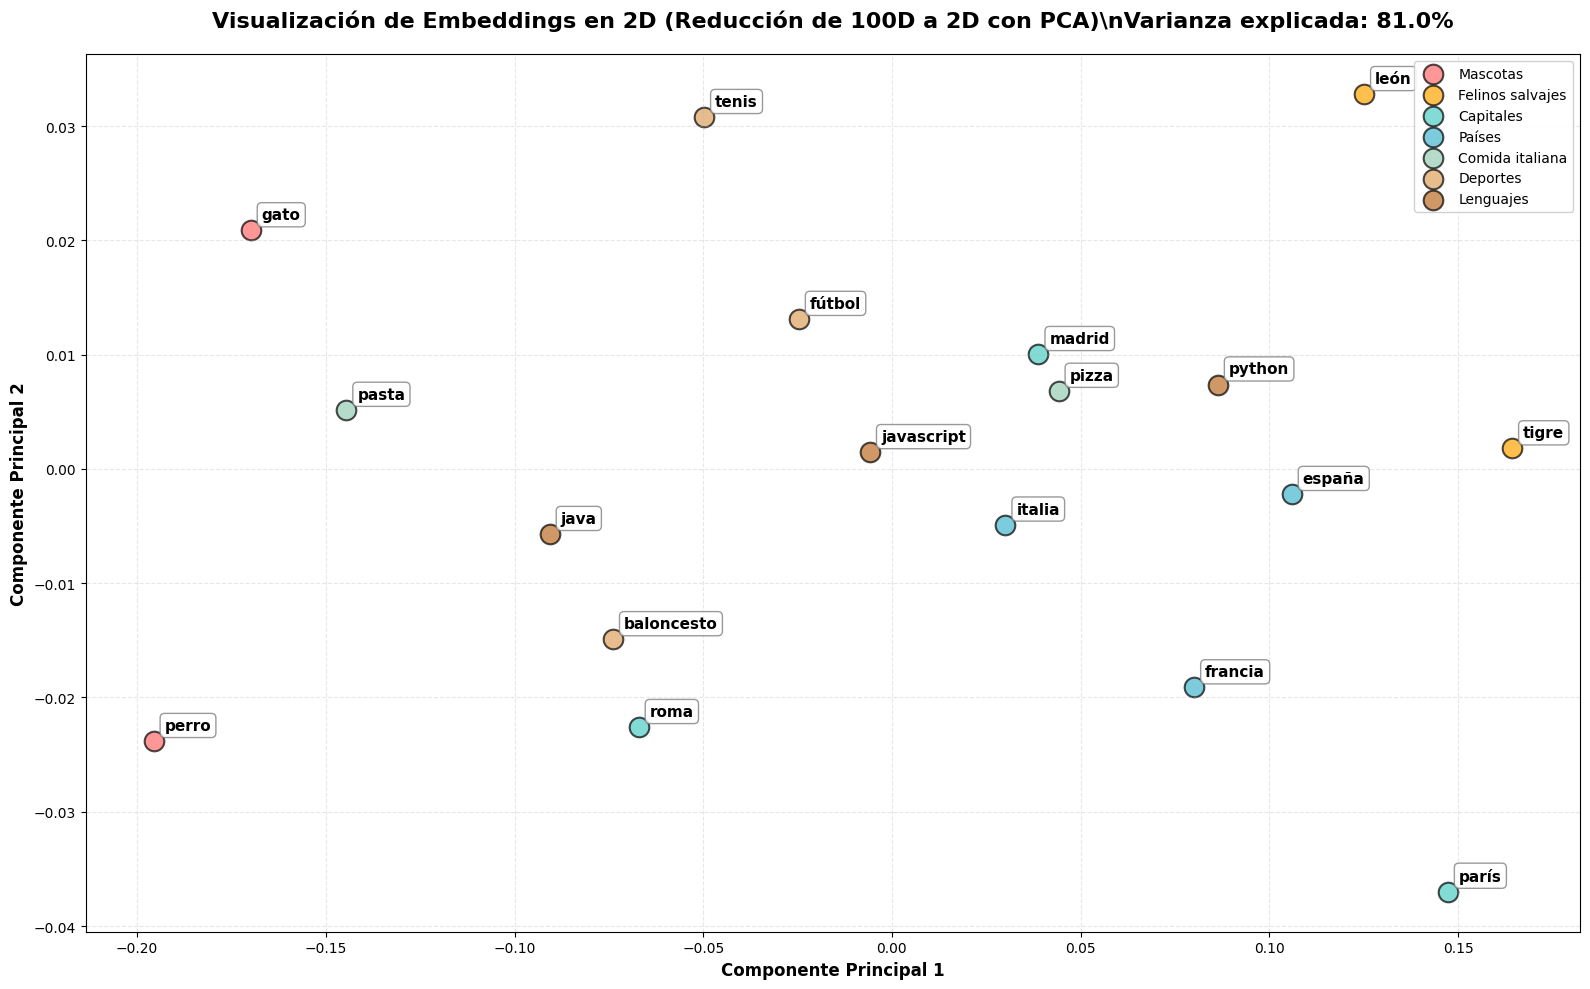


INTERPRETACIÓN DEL GRÁFICO:
• Palabras CERCANAS = embeddings similares = significados relacionados
• Palabras LEJANAS = embeddings diferentes = significados no relacionados

Deberías observar CLUSTERS (grupos) de palabras:
  - Mascotas (perro, gato) agrupadas
  - Felinos salvajes (león, tigre) agrupados
  - Capitales cerca de sus respectivos países
  - Platos italianos juntos
  - Deportes formando un grupo
  - Lenguajes de programación juntos

NOTA: PCA conserva 81.0% de la información original


In [19]:
# =============================================================================
# EJEMPLO 17: Visualización de Embeddings en 2D
# =============================================================================
# Los embeddings son vectores de 100 dimensiones, imposibles de visualizar directamente
# Usamos PCA (Principal Component Analysis) para reducirlos a 2D y poder graficarlos

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- SELECCIONAR PALABRAS PARA VISUALIZAR POR CATEGORÍAS ---
# Seleccionamos palabras representativas de diferentes categorías
palabras_por_categoria = {
    'Mascotas': ['perro', 'gato'],
    'Felinos salvajes': ['león', 'tigre'],
    'Capitales': ['madrid', 'parís', 'roma'],
    'Países': ['españa', 'francia', 'italia'],
    'Comida italiana': ['pizza', 'pasta'],
    'Deportes': ['fútbol', 'baloncesto', 'tenis'],
    'Lenguajes': ['python', 'javascript', 'java'],
}

# Colores diferentes para cada categoría
colores = {
    'Mascotas': '#FF6B6B',           # Rojo
    'Felinos salvajes': '#FFA500',   # Naranja
    'Capitales': '#4ECDC4',          # Turquesa
    'Países': '#45B7D1',             # Azul claro
    'Comida italiana': '#96CEB4',    # Verde
    'Deportes': '#DDA15E',           # Marrón
    'Lenguajes': '#BC6C25',          # Marrón oscuro
}

# Recopilar todas las palabras y sus categorías
todas_palabras = []
palabra_a_categoria = {}
for categoria, palabras in palabras_por_categoria.items():
    for palabra in palabras:
        if palabra in modelo.wv:
            todas_palabras.append(palabra)
            palabra_a_categoria[palabra] = categoria

# --- OBTENER LOS VECTORES (EMBEDDINGS) ---
# Crear una matriz donde cada fila es el embedding de una palabra
vectores = np.array([modelo.wv[palabra] for palabra in todas_palabras])

# --- REDUCIR DIMENSIONALIDAD: 100D -> 2D ---
# PCA encuentra las 2 dimensiones que capturan la mayor varianza de los datos
pca = PCA(n_components=2, random_state=42)
vectores_2d = pca.fit_transform(vectores)

# Calcular qué porcentaje de la información se conserva
varianza_explicada = sum(pca.explained_variance_ratio_) * 100

# --- CREAR GRÁFICO ---
plt.figure(figsize=(16, 10))

# Scatter plot por categoría con colores diferentes
for categoria in palabras_por_categoria.keys():
    # Indices de palabras de esta categoría
    indices = [i for i, palabra in enumerate(todas_palabras) 
               if palabra_a_categoria[palabra] == categoria]
    
    if indices:
        # Coordenadas X e Y para esta categoría
        x = vectores_2d[indices, 0]
        y = vectores_2d[indices, 1]
        
        # Dibujar puntos
        plt.scatter(x, y, 
                   s=200,                      # Tamaño de los puntos
                   alpha=0.7,                  # Transparencia
                   c=colores[categoria],       # Color por categoría
                   label=categoria,            # Para la leyenda
                   edgecolors='black',         # Borde negro
                   linewidth=1.5)

# --- AÑADIR ETIQUETAS A CADA PUNTO ---
for i, palabra in enumerate(todas_palabras):
    plt.annotate(palabra, 
                xy=(vectores_2d[i, 0], vectores_2d[i, 1]),
                xytext=(8, 8),                 # Desplazamiento del texto
                textcoords='offset points',
                fontsize=11,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         edgecolor='gray',
                         alpha=0.8))

# --- CONFIGURAR EL GRÁFICO ---
plt.title(f'Visualización de Embeddings en 2D (Reducción de 100D a 2D con PCA)\\n' +
         f'Varianza explicada: {varianza_explicada:.1f}%', 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Componente Principal 1', fontsize=12, fontweight='bold')
plt.ylabel('Componente Principal 2', fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\nINTERPRETACIÓN DEL GRÁFICO:")
print("=" * 60)
print("• Palabras CERCANAS = embeddings similares = significados relacionados")
print("• Palabras LEJANAS = embeddings diferentes = significados no relacionados")
print("\nDeberías observar CLUSTERS (grupos) de palabras:")
print("  - Mascotas (perro, gato) agrupadas")
print("  - Felinos salvajes (león, tigre) agrupados")
print("  - Capitales cerca de sus respectivos países")
print("  - Platos italianos juntos")
print("  - Deportes formando un grupo")
print("  - Lenguajes de programación juntos")
print(f"\nNOTA: PCA conserva {varianza_explicada:.1f}% de la información original")

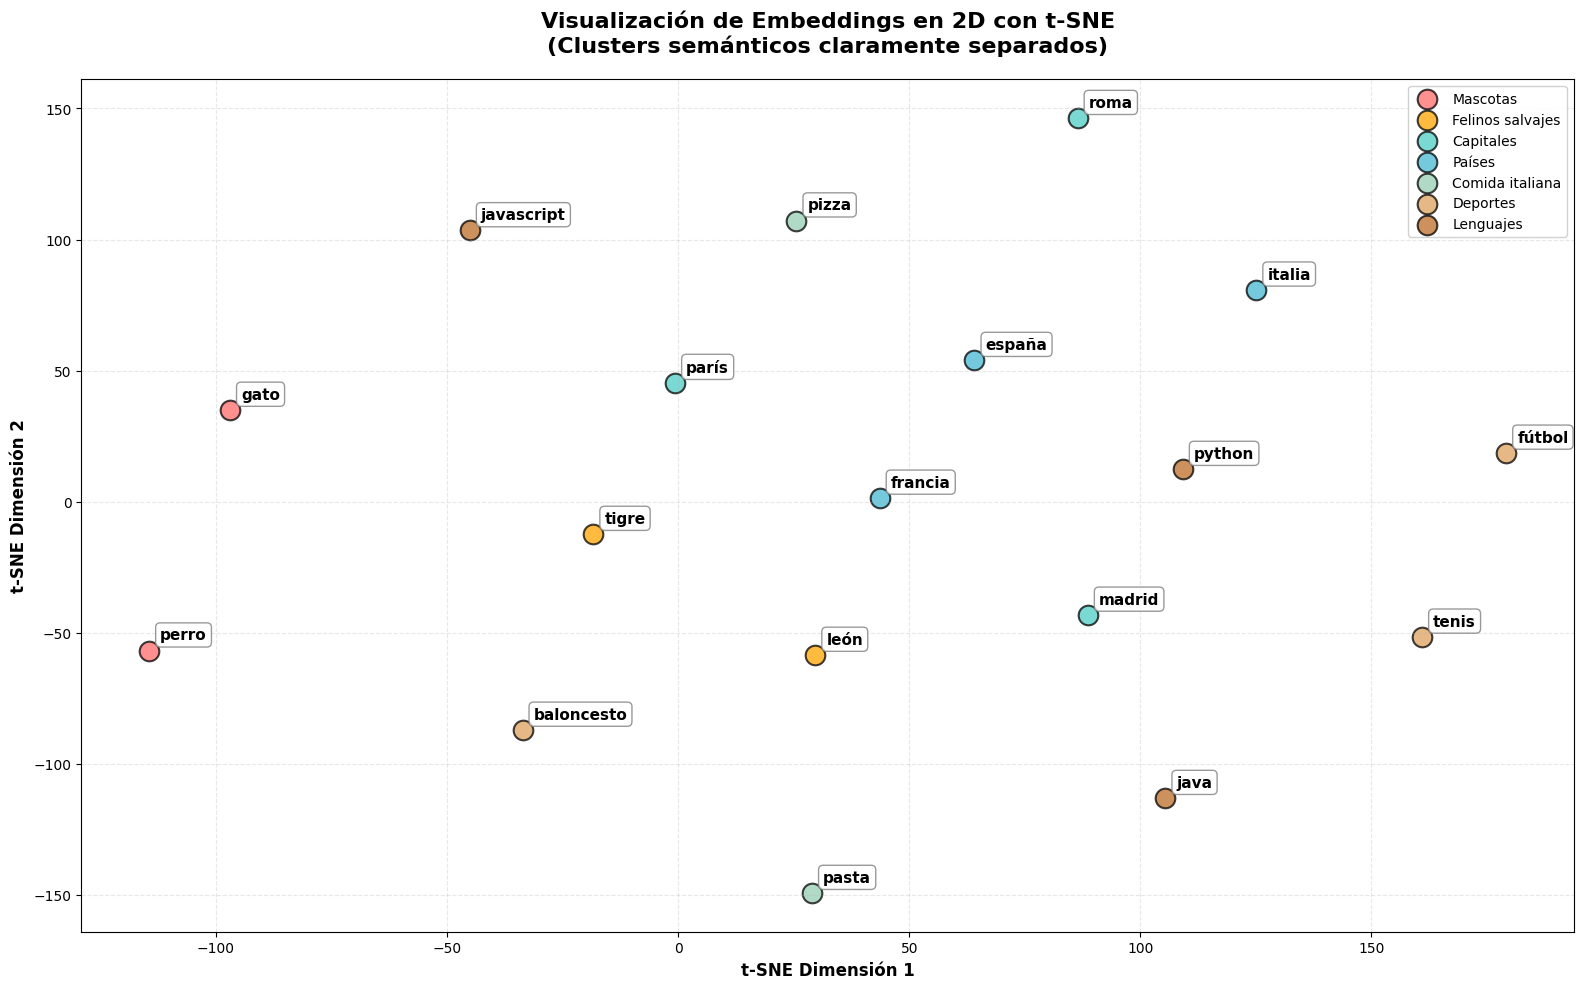


INTERPRETACIÓN DEL GRÁFICO:
• t-SNE agrupa de forma clara las palabras con significado similar.
• Palabras CERCANAS = embeddings similares (relación semántica).
• Palabras LEJANAS = significados diferentes.

Deberías ver clusters como:
  - Mascotas juntas (perro, gato)
  - Felinos salvajes juntos (león, tigre)
  - Capitales cerca de sus países (madrid-españa, etc.)
  - Platos italianos agrupados (pizza, pasta)
  - Deportes formando un grupo
  - Lenguajes de programación juntos

Esta visualización está optimizada para ver agrupamientos semánticos.


In [22]:
# =============================================================================
# VISUALIZACIÓN MEJORADA DE EMBEDDINGS EN 2D
# Usando t-SNE (mejor que PCA para ver clusters semánticos)
# =============================================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

# --- SELECCIONAR PALABRAS PARA VISUALIZAR POR CATEGORÍAS ---
palabras_por_categoria = {
    'Mascotas': ['perro', 'gato'],
    'Felinos salvajes': ['león', 'tigre'],
    'Capitales': ['madrid', 'parís', 'roma'],
    'Países': ['españa', 'francia', 'italia'],
    'Comida italiana': ['pizza', 'pasta'],
    'Deportes': ['fútbol', 'baloncesto', 'tenis'],
    'Lenguajes': ['python', 'javascript', 'java'],
}

# Colores para cada categoría
colores = {
    'Mascotas': '#FF6B6B',
    'Felinos salvajes': '#FFA500',
    'Capitales': '#4ECDC4',
    'Países': '#45B7D1',
    'Comida italiana': '#96CEB4',
    'Deportes': '#DDA15E',
    'Lenguajes': '#BC6C25',
}

# --- RECOPILAR PALABRAS DISPONIBLES EN EL MODELO ---
todas_palabras = []
palabra_a_categoria = {}

for categoria, palabras in palabras_por_categoria.items():
    for palabra in palabras:
        if palabra in modelo.wv:
            todas_palabras.append(palabra)
            palabra_a_categoria[palabra] = categoria

# Si no hay palabras válidas, evitar error
if not todas_palabras:
    raise ValueError("Ninguna de las palabras seleccionadas está en el vocabulario del modelo.")

# --- OBTENER LOS VECTORES EMBEDDING ---
vectores = np.array([modelo.wv[palabra] for palabra in todas_palabras])

# --- NORMALIZAR VECTORES (MEJORA LA GEOMETRÍA PARA t-SNE) ---
vectores = normalize(vectores)

# --- REDUCCIÓN DE DIMENSIONALIDAD CON t-SNE ---
# Usamos solo parámetros ampliamente soportados (compatibles con versiones antiguas)
tsne = TSNE(
    n_components=2,
    perplexity=15,
    learning_rate=200,
    random_state=42
)

vectores_2d = tsne.fit_transform(vectores)

# --- CREAR GRÁFICO ---
plt.figure(figsize=(16, 10))

# Graficar puntos por categoría
for categoria in palabras_por_categoria.keys():
    indices = [i for i, palabra in enumerate(todas_palabras)
               if palabra_a_categoria[palabra] == categoria]
    
    if indices:
        x = vectores_2d[indices, 0]
        y = vectores_2d[indices, 1]

        plt.scatter(
            x, y,
            s=200,
            alpha=0.75,
            c=colores[categoria],
            label=categoria,
            edgecolors='black',
            linewidth=1.5
        )

# --- ETIQUETAS ---
for i, palabra in enumerate(todas_palabras):
    plt.annotate(
        palabra,
        xy=(vectores_2d[i, 0], vectores_2d[i, 1]),
        xytext=(8, 8),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold',
        bbox=dict(
            boxstyle='round,pad=0.3',
            facecolor='white',
            edgecolor='gray',
            alpha=0.8
        )
    )

# --- CONFIGURACIÓN DEL GRÁFICO ---
plt.title(
    'Visualización de Embeddings en 2D con t-SNE\n'
    '(Clusters semánticos claramente separados)',
    fontsize=16,
    fontweight='bold',
    pad=20
)

plt.xlabel('t-SNE Dimensión 1', fontsize=12, fontweight='bold')
plt.ylabel('t-SNE Dimensión 2', fontsize=12, fontweight='bold')
plt.legend(loc='best', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# --- INTERPRETACIÓN ---
print("\nINTERPRETACIÓN DEL GRÁFICO:")
print("=" * 60)
print("• t-SNE agrupa de forma clara las palabras con significado similar.")
print("• Palabras CERCANAS = embeddings similares (relación semántica).")
print("• Palabras LEJANAS = significados diferentes.")
print("\nDeberías ver clusters como:")
print("  - Mascotas juntas (perro, gato)")
print("  - Felinos salvajes juntos (león, tigre)")
print("  - Capitales cerca de sus países (madrid-españa, etc.)")
print("  - Platos italianos agrupados (pizza, pasta)")
print("  - Deportes formando un grupo")
print("  - Lenguajes de programación juntos")
print("\nEsta visualización está optimizada para ver agrupamientos semánticos.")


### Ejercicio Práctico 2

Crea tu propio modelo de embeddings con un corpus personalizado:

In [20]:
# =============================================================================
# EJEMPLO 18: Ejercicio Práctico - Crea Tu Propio Modelo
# =============================================================================
# ¡Ahora te toca a ti! Crea un corpus sobre un tema que te interese
# y entrena tu propio modelo de embeddings

# --- TU CORPUS PERSONALIZADO ---
# Completa este corpus con frases sobre el tema que elijas
# IMPORTANTE: 
#  - Mínimo 30 frases para obtener buenos resultados
#  - Todo en minúsculas
#  - Usa vocabulario repetido para que el modelo aprenda patrones
#  - Mantén consistencia temática

# TEMA DE EJEMPLO: SISTEMA SOLAR (puedes cambiarlo por el tema que quieras)
mi_corpus = [
    # Planetas interiores
    ['mercurio', 'es', 'el', 'planeta', 'más', 'cercano', 'al', 'sol'],
    ['mercurio', 'es', 'un', 'planeta', 'pequeño', 'y', 'rocoso'],
    ['venus', 'es', 'el', 'segundo', 'planeta', 'del', 'sistema', 'solar'],
    ['venus', 'es', 'muy', 'caliente', 'por', 'su', 'atmósfera', 'densa'],
    ['la', 'tierra', 'es', 'el', 'tercer', 'planeta', 'desde', 'el', 'sol'],
    ['la', 'tierra', 'tiene', 'agua', 'y', 'vida'],
    ['marte', 'es', 'el', 'cuarto', 'planeta', 'del', 'sistema', 'solar'],
    ['marte', 'es', 'conocido', 'como', 'el', 'planeta', 'rojo'],
    
    # Planetas exteriores
    ['júpiter', 'es', 'el', 'planeta', 'más', 'grande', 'del', 'sistema', 'solar'],
    ['júpiter', 'es', 'un', 'gigante', 'gaseoso', 'masivo'],
    ['saturno', 'es', 'famoso', 'por', 'sus', 'anillos', 'espectaculares'],
    ['saturno', 'es', 'un', 'gigante', 'gaseoso', 'hermoso'],
    ['urano', 'es', 'un', 'planeta', 'helado', 'y', 'distante'],
    ['urano', 'tiene', 'un', 'color', 'azul', 'verdoso'],
    ['neptuno', 'es', 'el', 'planeta', 'más', 'lejano', 'del', 'sol'],
    ['neptuno', 'es', 'un', 'planeta', 'helado', 'y', 'azul'],
    
    # Características generales
    ['los', 'planetas', 'rocosos', 'son', 'pequeños', 'y', 'densos'],
    ['los', 'planetas', 'rocosos', 'están', 'cerca', 'del', 'sol'],
    ['los', 'gigantes', 'gaseosos', 'son', 'enormes', 'y', 'ligeros'],
    ['los', 'gigantes', 'gaseosos', 'están', 'lejos', 'del', 'sol'],
    
    # El sol
    ['el', 'sol', 'es', 'una', 'estrella', 'amarilla'],
    ['el', 'sol', 'es', 'el', 'centro', 'del', 'sistema', 'solar'],
    ['el', 'sol', 'proporciona', 'luz', 'y', 'calor', 'a', 'los', 'planetas'],
    
    # AÑADE MÁS FRASES AQUÍ O CAMBIA EL TEMA COMPLETAMENTE
    # Otros temas sugeridos:
    # - Cocina (ingredientes, recetas, técnicas)
    # - Música (instrumentos, géneros, artistas)
    # - Historia (eventos, personajes, épocas)
    # - Ciencia (elementos, procesos, descubrimientos)
    # - Deportes (equipos, jugadores, competiciones)
]

print("ENTRENANDO TU MODELO PERSONALIZADO")
print("=" * 60)

# --- ENTRENAR TU MODELO ---
if len(mi_corpus) >= 15:  # Verificar que haya suficientes frases
    print(f"Corpus: {len(mi_corpus)} frases")
    print("Entrenando modelo...\n")
    
    # Crear y entrenar el modelo Word2Vec
    mi_modelo = Word2Vec(
        sentences=mi_corpus,
        vector_size=100,  # 100 dimensiones
        window=5,         # Contexto de 5 palabras a cada lado
        min_count=2,      # Ignorar palabras que aparecen solo 1 vez
        sg=1,             # Usar Skip-gram
        epochs=100,       # 100 iteraciones
        seed=42           # Reproducibilidad
    )
    
    print("✓ ¡Modelo entrenado con éxito!")
    print(f"Vocabulario: {len(mi_modelo.wv)} palabras únicas")
    print(f"\nPalabras en el vocabulario:")
    print(list(mi_modelo.wv.index_to_key))
    
    # --- EXPLORAR TU MODELO ---
    print("\n" + "=" * 60)
    print("EXPLORANDO TU MODELO")
    print("=" * 60)
    
    # Ejemplos de palabras para explorar (ajusta según tu tema)
    palabras_explorar = ['tierra', 'júpiter', 'sol', 'planeta']
    
    for palabra in palabras_explorar:
        if palabra in mi_modelo.wv:
            print(f"\nPalabras similares a '{palabra}':")
            try:
                similares = mi_modelo.wv.most_similar(palabra, topn=5)
                for sim_palabra, score in similares:
                    print(f"  → {sim_palabra:15} (similitud: {score:.3f})")
            except:
                print("  (No hay suficientes palabras para comparar)")
    
    # --- PRUEBA ARITMÉTICA DE EMBEDDINGS ---
    print("\n" + "=" * 60)
    print("ARITMÉTICA CON TUS EMBEDDINGS")
    print("=" * 60)
    
    # Ejemplo: planetas rocosos vs gaseosos
    if all(w in mi_modelo.wv for w in ['tierra', 'marte', 'júpiter']):
        print("\nRelación: tierra : marte :: júpiter : ?")
        print("(Si tierra es similar a marte, ¿qué planeta es similar a júpiter?)")
        try:
            resultado = mi_modelo.wv.most_similar(
                positive=['marte', 'júpiter'],
                negative=['tierra'],
                topn=3
            )
            for palabra, score in resultado:
                print(f"  → {palabra} (confianza: {score:.3f})")
        except:
            print("  (No hay suficientes datos para esta operación)")
    
    print("\n" + "=" * 60)
    print("¡Experimenta con tu propio corpus!")
    print("Prueba diferentes temas y observa cómo el modelo aprende relaciones")
    
else:
    print(f"⚠️ Añade más frases a tu corpus (mínimo 15, recomendado 30+)")
    print(f"Actualmente tienes {len(mi_corpus)} frases")
    print("\nCONSEJOS PARA UN BUEN CORPUS:")
    print("  1. Más frases = mejor modelo (intenta 50-100+)")
    print("  2. Usa vocabulario repetido para que el modelo aprenda patrones")
    print("  3. Mantén consistencia en el tema")
    print("  4. Todo en minúsculas para evitar duplicados")
    print("  5. Cada categoría debería tener al menos 5-10 frases")

ENTRENANDO TU MODELO PERSONALIZADO
Corpus: 23 frases
Entrenando modelo...

✓ ¡Modelo entrenado con éxito!
Vocabulario: 32 palabras únicas

Palabras en el vocabulario:
['es', 'el', 'planeta', 'sol', 'del', 'y', 'un', 'los', 'solar', 'sistema', 'planetas', 'más', 'gaseosos', 'gigantes', 'están', 'son', 'rocosos', 'neptuno', 'azul', 'helado', 'urano', 'saturno', 'gaseoso', 'gigante', 'júpiter', 'marte', 'tiene', 'tierra', 'la', 'por', 'venus', 'mercurio']

EXPLORANDO TU MODELO

Palabras similares a 'tierra':
  → azul            (similitud: 0.374)
  → un              (similitud: 0.311)
  → gigantes        (similitud: 0.298)
  → planeta         (similitud: 0.290)
  → y               (similitud: 0.274)

Palabras similares a 'júpiter':
  → y               (similitud: 0.479)
  → es              (similitud: 0.463)
  → planeta         (similitud: 0.400)
  → un              (similitud: 0.370)
  → neptuno         (similitud: 0.349)

Palabras similares a 'sol':
  → planeta         (similitud: 0.524




#### RESUMEN Y CONCEPTOS CLAVE

### Token
- **Qué es**: Una pieza individual de texto
- **Ejemplo**: "Hola" es un token, "!" es otro token
- **Por qué importa**: Los modelos procesan texto token por token

### Tokenización
- **Qué es**: El proceso de dividir texto en tokens
- **Ejemplo**: "Hola mundo" → ["Hola", "mundo"]
- **Por qué importa**: Es el primer paso para procesar lenguaje natural

### Tokenización para LLMs
- **Qué es**: Convertir texto en números para entrenar modelos
- **Pasos**:
  1. Crear vocabulario
  2. Asignar IDs a cada token
  3. Convertir texto a secuencias de IDs
  4. Crear pares de entrenamiento
- **Por qué importa**: Así aprenden los modelos como GPT

### Embeddings
- **Qué es**: Vectores que representan el significado de palabras
- **Ejemplo**: "rey" = [0.9, 0.1, 0.8, ...]
- **Magia**: Palabras similares tienen vectores similares
- **Por qué importa**: Permiten que los modelos entiendan significados










